In [6]:
from cells.hallermann2012 import iteration2
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(iteration2)
config = iteration2.Config()
cellbuilder = lambda: iteration2.SPI6(config)

# Calculate Rheobase

Calculating the Rheobase through iterating until first action potential is generated

In [7]:
from helpers.rheobase import *

overparams, underparams = calculateRheobase(cellbuilder)

Intial guess -0.2
Running in range  0.6000000000000001 from  -0.2 to  0.4000000000000001
Detected first AP at 0.22000000000000008  [mv]
Intial guess 0.22000000000000008
Running in range  0.06600000000000003 from  0.15400000000000005 to  0.28600000000000014
Detected first AP at 0.19690000000000007  [mv]
Intial guess 0.19690000000000007
Running in range  0.0059070000000000025 from  0.19099300000000008 to  0.20280700000000007
Detected first AP at 0.19453720000000008  [mv]


In [11]:
from helpers.generic import *

undertrace = stimulate(cellbuilder, underparams)
overtrace = stimulate(cellbuilder, overparams)

In [15]:
overparams

{'delay': 100, 'dur': 500, 'amp': 0.19453720000000008}

## Plotting of the acquired Traces

With the help of matplotlib

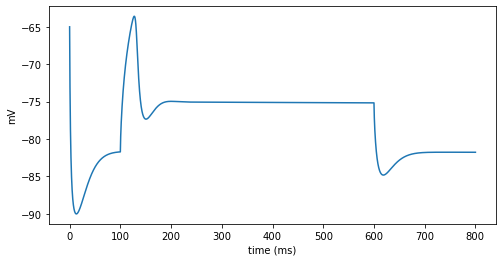

In [12]:
from helpers import generic
reload(generic)
generic.plotTrace(undertrace)

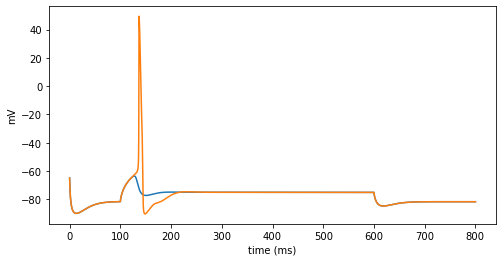

In [13]:
# One Trace
from helpers import generic
reload(generic)
generic.plotTraces([undertrace,overtrace])

## Plotting of the initial AP

Plots the first AP that is being genarated by the Plot

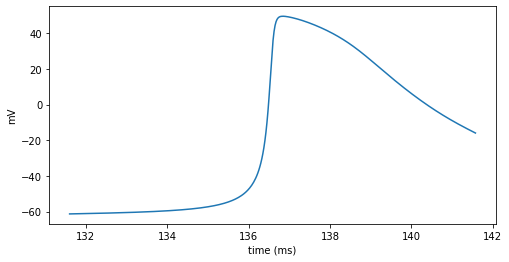

In [14]:
from helpers.generic import isolateTime, plotTrace

firstpeaktime = overtrace["aps"][0]
newtrace = isolateTime(overtrace, firstpeaktime)
plotTrace(newtrace)
